In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [60]:
# Load data file
bank=pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [61]:
# Check if the data set contains any null values - Nothing found!
bank[bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [62]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


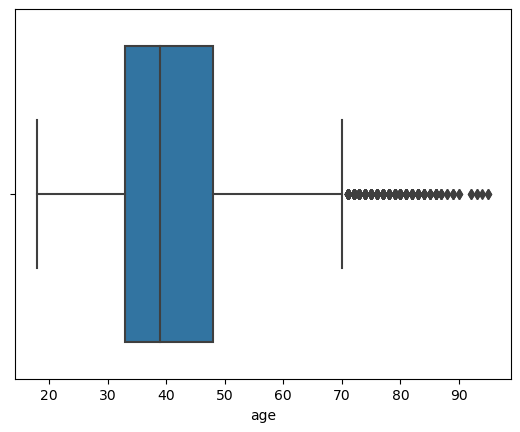

In [63]:
# Boxplot for 'age'
g = sns.boxplot(x=bank["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

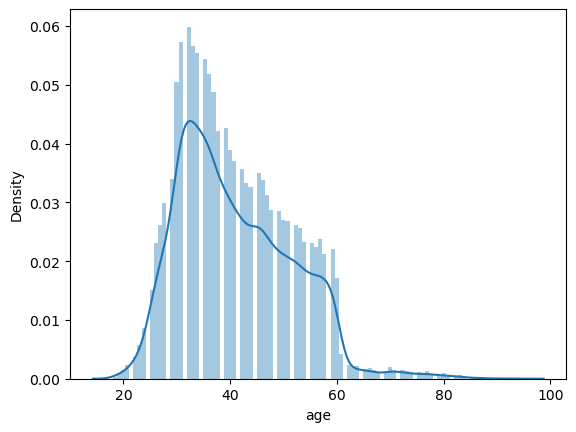

In [122]:
# Distribution of Age
sns.distplot(bank.age, bins=100)

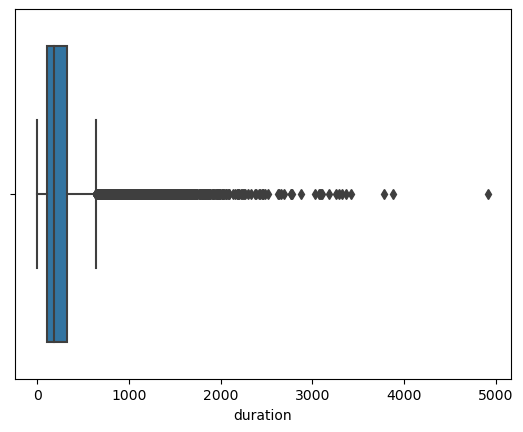

In [65]:
# Boxplot for 'duration'
g = sns.boxplot(x=bank["duration"])

<AxesSubplot:xlabel='duration', ylabel='Density'>

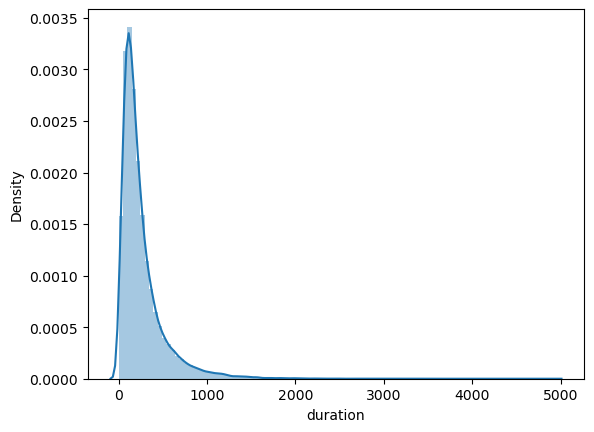

In [121]:
sns.distplot(bank.duration, bins=100)

In [67]:
# Make a copy for parsing
bank_data = bank.copy()

In [68]:
# Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [69]:
# Different types of job categories and their counts
bank_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [70]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [71]:
# New value counts
bank_data.job.value_counts()

white-collar     14629
blue-collar       9732
technician        7597
pink-collar       5394
other             4793
self-employed     1579
entrepreneur      1487
Name: job, dtype: int64

In [72]:
bank_data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [73]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [74]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

In [75]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [76]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [77]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [78]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [79]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [80]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 36954
Maximum values on padys    : 871


In [81]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [82]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [83]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
45206,51,technician,married,tertiary,825,977,3,0,unknown,0,0,0,1,0.000100
45207,71,other,divorced,primary,1729,456,2,0,unknown,0,0,0,1,0.000100
45208,72,other,married,secondary,5715,1127,5,3,success,0,0,0,1,0.005435
45209,57,blue-collar,married,secondary,668,508,4,0,unknown,0,0,0,0,0.000100
45210,37,entrepreneur,married,secondary,2971,361,2,11,unknown,0,0,0,0,0.005319


In [84]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,58,2143,261,1,0,0,1,0,0,0.0001,...,0,1,0,0,0,1,0,0,0,1
1,44,29,151,1,0,0,1,0,0,0.0001,...,0,0,1,0,1,0,0,0,0,1
2,33,2,76,1,0,0,1,1,0,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,47,1506,92,1,0,0,1,0,0,0.0001,...,0,1,0,0,0,0,1,0,0,1
4,33,1,198,1,0,0,0,0,0,0.0001,...,0,0,1,0,0,0,1,0,0,1


In [85]:
bank_with_dummies.shape

(45211, 27)

In [86]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.580323,0.018027,0.555838,0.160226,0.116985,0.002166,...,0.115171,0.601933,0.282896,0.151534,0.513194,0.294198,0.041074,0.108403,0.033421,0.858176
std,10.618762,3044.765829,257.527812,3.098021,2.303441,0.133049,0.496878,0.366820,0.321406,0.024128,...,0.319232,0.489505,0.450411,0.358572,0.499831,0.455687,0.198464,0.310892,0.179735,0.348873
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


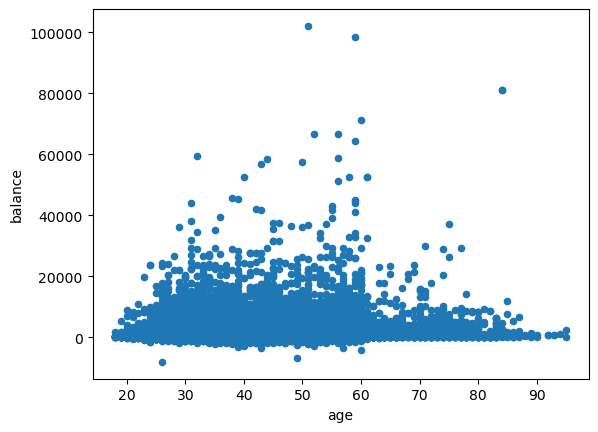

In [87]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 20000.

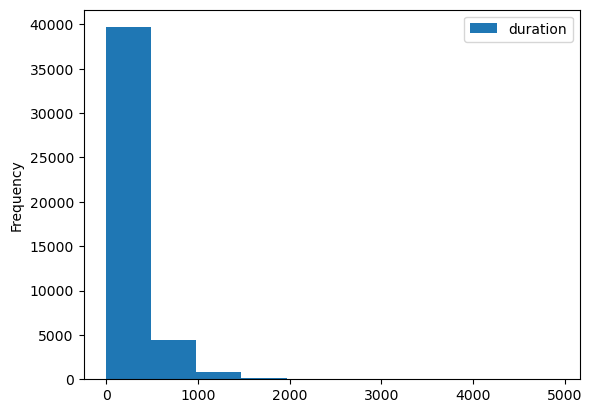

In [88]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [89]:
# People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

265

In [91]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

<AxesSubplot:xlabel='job', ylabel='deposit_cat'>

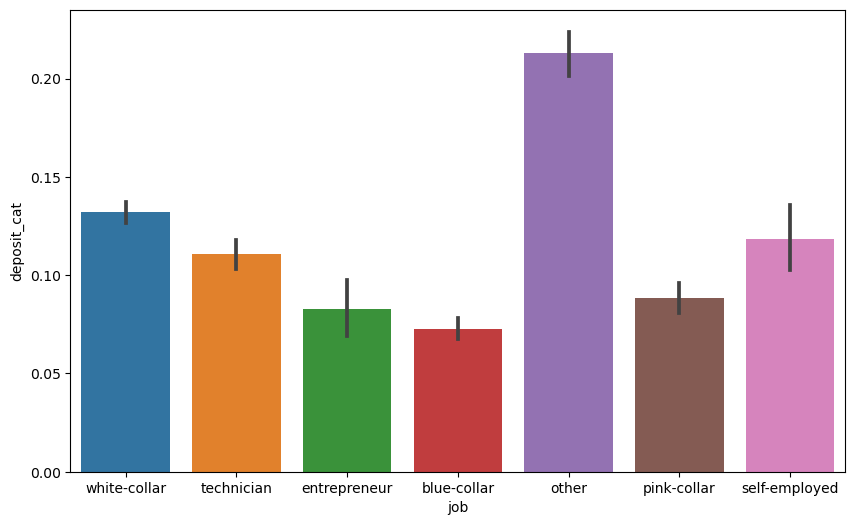

In [92]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

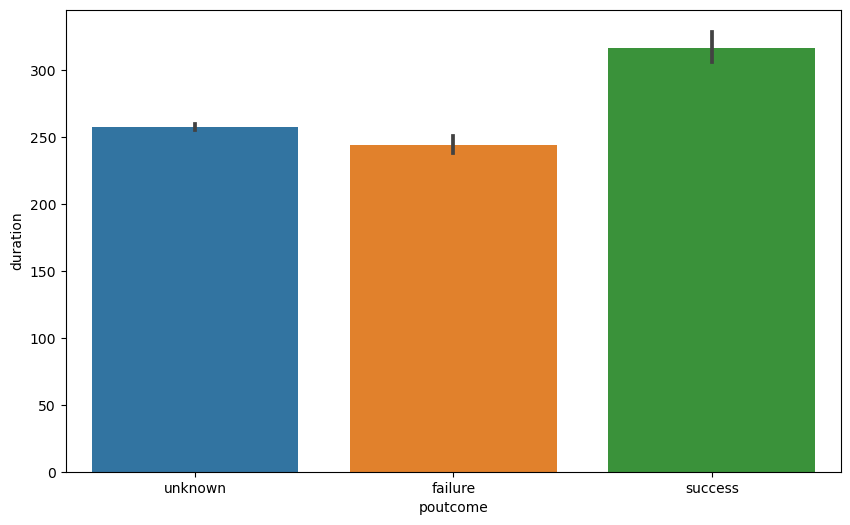

In [93]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [94]:
# make a copy
bankcl = bank_with_dummies

In [95]:
# The Correltion matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.004648,0.004760,0.001288,-0.017879,-0.185513,-0.015655,0.025155,0.012884,...,0.164674,0.286257,-0.427817,0.196182,-0.093979,-0.081629,0.069665,-0.004927,0.035526,-0.013912
balance,0.097783,1.000000,0.021560,-0.014578,0.016674,-0.066745,-0.068768,-0.084350,0.052838,-0.003702,...,-0.021732,0.025708,-0.012537,-0.015451,-0.069937,0.084001,0.011181,0.011857,0.035240,-0.028721
duration,-0.004648,0.021560,1.000000,-0.084570,0.001203,-0.010021,0.005075,-0.012412,0.394521,-0.003196,...,0.006100,-0.022683,0.020328,-0.003660,0.002084,0.000891,-0.000682,-0.018925,0.042389,-0.004974
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.032855,0.016822,-0.023599,0.009980,-0.073172,-0.023789,...,-0.015484,0.031371,-0.023120,0.009616,-0.020893,0.012866,0.005704,-0.088131,-0.057486,0.108153
previous,0.001288,0.016674,0.001203,-0.032855,1.000000,-0.018329,0.037076,-0.011043,0.093236,0.099094,...,-0.004534,-0.012691,0.017006,-0.016705,-0.005603,0.022888,-0.008257,0.350627,0.201424,-0.416226
default_cat,-0.017879,-0.066745,-0.010021,0.016822,-0.018329,1.000000,-0.006025,0.077234,-0.022419,-0.009932,...,0.017777,-0.014460,0.003115,0.001623,0.013220,-0.015239,-0.001236,-0.026389,-0.023344,0.035542
housing_cat,-0.185513,-0.068768,0.005075,-0.023599,0.037076,-0.006025,1.000000,0.041323,-0.139173,-0.017263,...,0.001778,0.017681,-0.020475,0.010671,0.101659,-0.099175,-0.047595,0.106795,-0.091360,-0.048101
loan_cat,-0.015655,-0.084350,-0.012412,0.009980,-0.011043,0.077234,0.041323,1.000000,-0.068185,-0.005574,...,0.016377,0.036906,-0.051716,-0.012396,0.070625,-0.045940,-0.049992,-0.002186,-0.053713,0.029620
deposit_cat,0.025155,0.052838,0.394521,-0.073172,0.093236,-0.022419,-0.139173,-0.068185,1.000000,0.031259,...,0.002772,-0.060260,0.063526,-0.040393,-0.036388,0.066448,0.012053,0.009885,0.306788,-0.166863
recent_pdays,0.012884,-0.003702,-0.003196,-0.023789,0.099094,-0.009932,-0.017263,-0.005574,0.031259,1.000000,...,-0.006304,0.003896,0.000233,-0.010473,-0.008755,0.017972,-0.000294,0.064452,0.099985,-0.108946


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

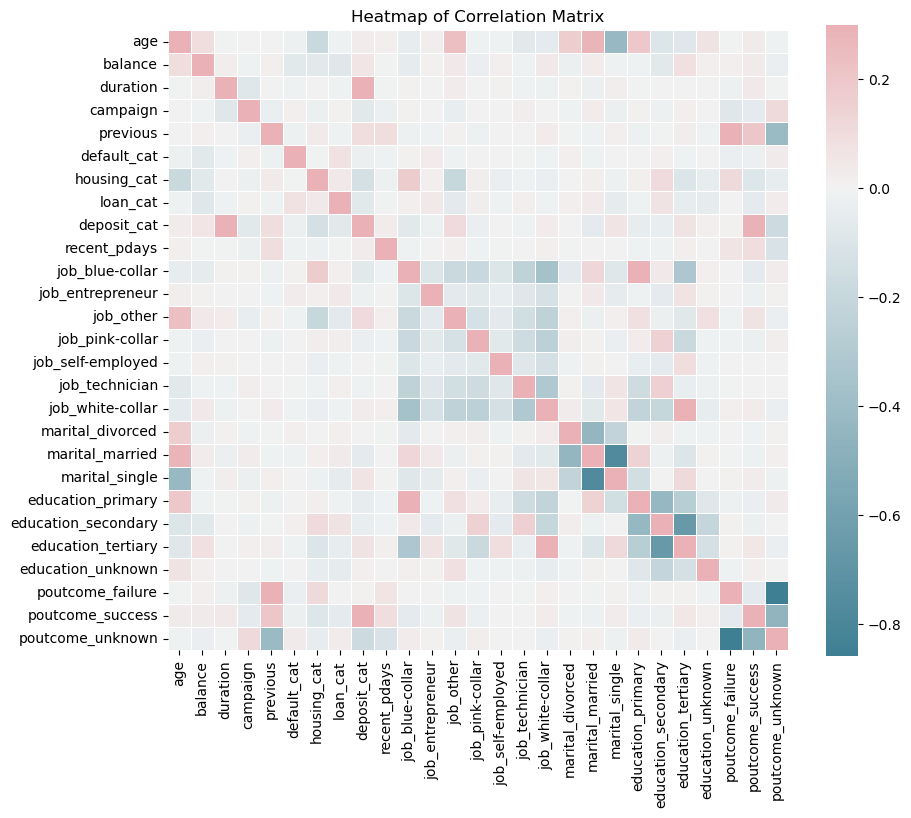

In [96]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [97]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.394521
poutcome_success,0.306788
job_other,0.102895
previous,0.093236
education_tertiary,0.066448
marital_single,0.063526
balance,0.052838
job_white-collar,0.032454
recent_pdays,0.031259
age,0.025155


In [120]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', 1)
label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [99]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8921422251714223
Testing score:  0.8908548048214088


In [100]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.9000774165007742
Testing score:  0.9020236647130377


In [101]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.9009345277593452
Testing score:  0.9022448302554462


In [102]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.9040588365405884
Testing score:  0.9011390025434037


In [103]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.854583655866416


In [104]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.8921422251714223   0.8908548048214088
3        0.9000774165007742   0.9020236647130377
4        0.9009345277593452   0.9022448302554462
6        0.9040588365405884   0.9011390025434037
max                     1.0    0.854583655866416


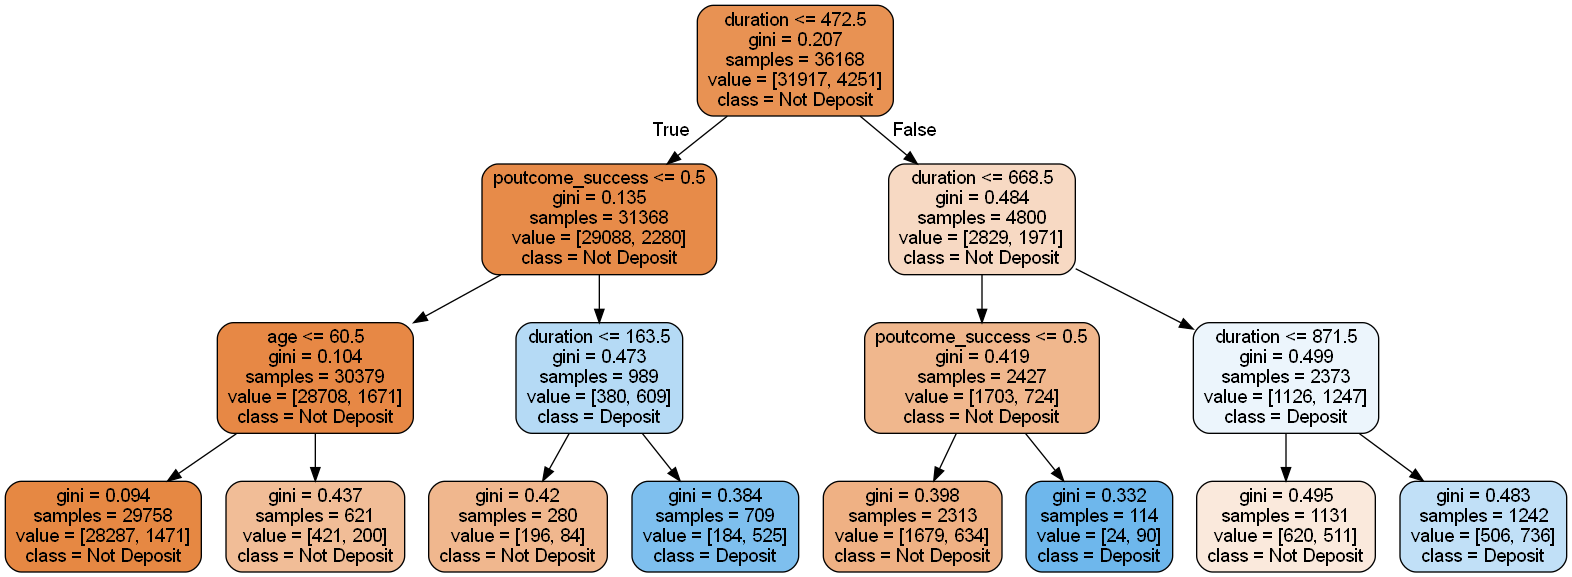

In [128]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("tree2.dot",'w') as f:
    f=tree.export_graphviz(dt3,
    out_file=f,
    max_depth=3,
    impurity=True,
    #feature_names=features,
    feature_names=list(bankcl.drop(['deposit_cat'],axis=1)),
    class_names=['Not Deposit','Deposit'],
    rounded=True,
    filled=True
    )

check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

img = Image.open("tree2.png")
draw = ImageDraw.Draw(img)
img.save('sample-out2.png')
PImage("sample-out2.png")

In [106]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1], dtype=int64)

In [107]:
# Create a feature vector
features = data_drop_deposite.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [108]:
# Investigate most important features with depth =2

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.6408119444682769
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.35918805553172306
poutcome_unknown.... 0.0


In [109]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  258.1630797814691
Maximun duration:  4918
Minimum duration:  0


In [118]:
# Predict: Successful deposite with a call duration = 371 sec

print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432

[[0.38422649 0.61577351]]
[1]


In [117]:
# Predict: Successful deposite with a maximun call duration = 3881 sec

print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.47450485 0.52549515]]
[1]


In [112]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposite.iloc[985]

age                     40.0000
balance                350.0000
duration               287.0000
campaign                 1.0000
previous                 0.0000
default_cat              0.0000
housing_cat              1.0000
loan_cat                 0.0000
recent_pdays             0.0001
job_blue-collar          0.0000
job_entrepreneur         0.0000
job_other                1.0000
job_pink-collar          0.0000
job_self-employed        0.0000
job_technician           0.0000
job_white-collar         0.0000
marital_divorced         0.0000
marital_married          0.0000
marital_single           1.0000
education_primary        0.0000
education_secondary      1.0000
education_tertiary       0.0000
education_unknown        0.0000
poutcome_failure         0.0000
poutcome_success         0.0000
poutcome_unknown         1.0000
Name: 985, dtype: float64

In [116]:
# Predict: Probability for above

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))
#print(ctree.predict(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.70168933 0.29831067]]


In [114]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.8908548048214088

Area Under Curve: 
0.7506327331544952
